In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML-Datasets/student_scores - student_scores.csv')

In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#Exploratory Data Analysis

In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#Distribution


<ipython-input-14-107ca045e11d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Scores"])


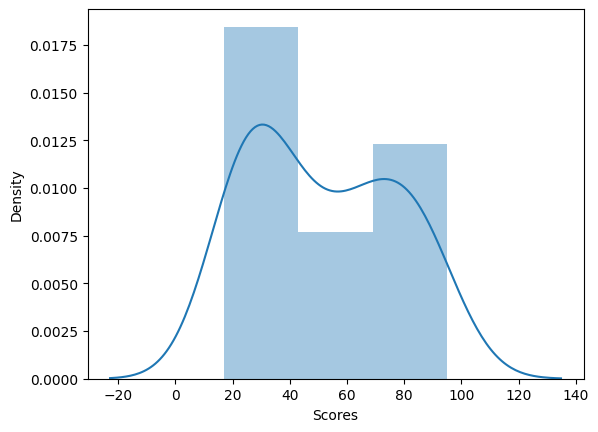

<ipython-input-14-107ca045e11d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Scores"], kde=False, rug=True)


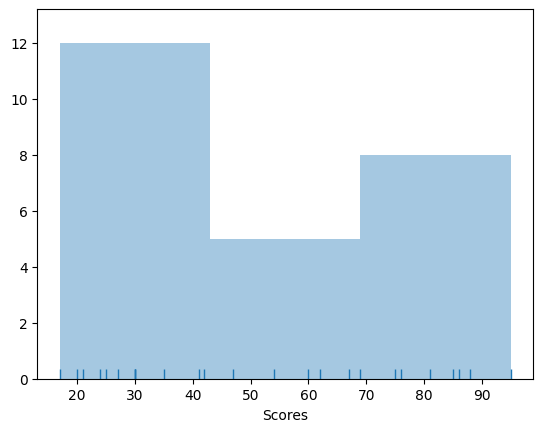

In [ ]:
sns.distplot(df["Scores"])
plt.show()

sns.distplot(df["Scores"], kde=False, rug=True)
plt.show()

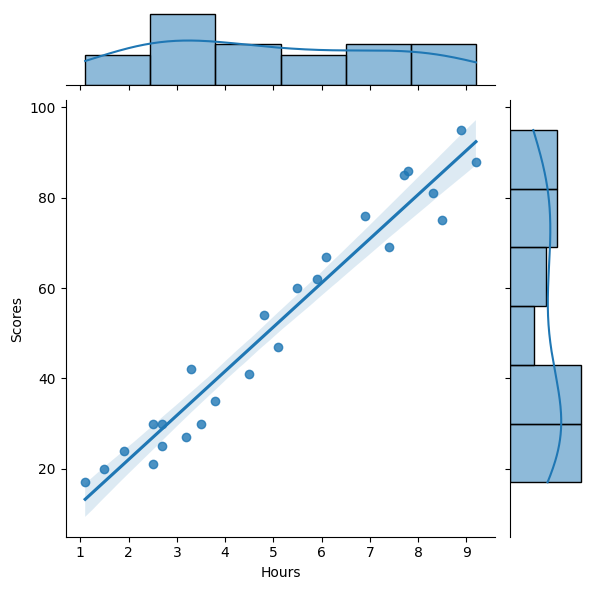

In [ ]:
sns.jointplot(x="Hours", y="Scores", data=df, kind="reg")
plt.show()

#Performing Simple Regression

**Calculating the coefficent of simple linear regression equation: y = B0 + B1.x (B1: Slope, B0: Intercept)**

In [23]:
mean_x = np.mean(df["Hours"])
mean_y = np.mean(df["Scores"])
num = 0
den = 0
x = list(df['Hours'])
y = list(df['Scores'])
for i in range(len(df)):
  num+=(x[i]-mean_x)*(y[i]-mean_y)
  den+=(x[i]-mean_x)**2
B1 = num/den

In [24]:
B1

9.775803390787475

In [25]:
B0 = mean_y - (B1*mean_x)

In [26]:
B0

2.4836734053731746

#Making Prediction

In [27]:
df['predicted_score'] = B0 + B1*df['Hours']

In [29]:
df.head()

,Hours,Scores,predicted_score
0,2.5,21,26.923182
1,5.1,47,52.340271
2,3.2,27,33.766244
3,8.5,75,85.578002
4,3.5,30,36.698985


[]

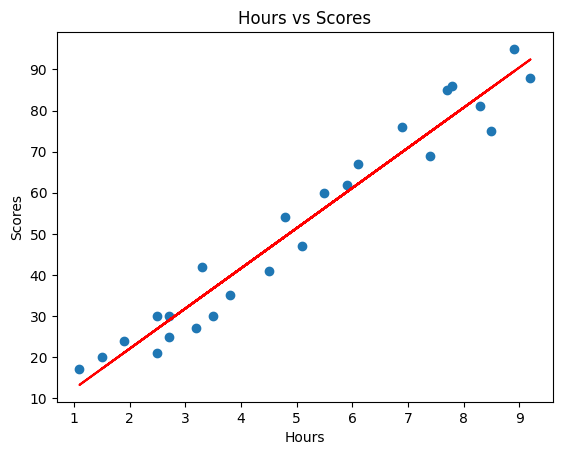

In [35]:
plt.scatter(df['Hours'], df['Scores'])
plt.plot(df['Hours'], df['predicted_score'], color="red")
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.plot()

Prediction of Given Value: 9.25

In [36]:
B0 + B1*9.25

92.90985477015732

In [37]:
y = list(df['Scores'].values)
y_pred = list(df['predicted_score'].values)

#RMSE

In [38]:
s = sum([(y_pred[i]-y[i])**2 for i in range(len(y))])
rmse = (np.sqrt(s/len(df)))/mean_y

In [39]:
rmse

0.10439521325937494

#OLS Model

In [40]:
model = smf.ols("Scores ~ Hours", data=df).fit()

In [41]:
df['pred_ols']= model.predict(df['Hours'])

[]

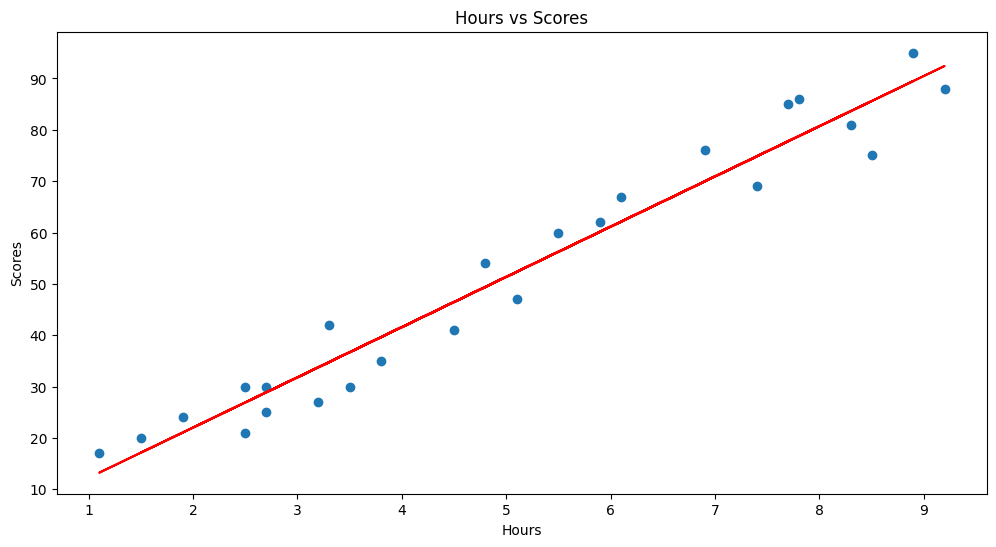

In [42]:
plt.figure(figsize=(12,6))
plt.plot(df['Hours'], df['pred_ols'], color="red")
plt.scatter(df['Hours'], df['Scores'])
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.plot()

**We can observe the predicted value for 9.25 hours is around 92**

#Additional Conclusion: Categorical Prediction

In [43]:
cut_off = 40

In [53]:
df['Passed?'] = df['Scores']>=40

In [54]:
df.head()

,Hours,Scores,predicted_score,pred_ols,Passed?
0,2.5,21,26.923182,26.923182,False
1,5.1,47,52.340271,52.340271,True
2,3.2,27,33.766244,33.766244,False
3,8.5,75,85.578002,85.578002,True
4,3.5,30,36.698985,36.698985,False


#Plotting the given data result

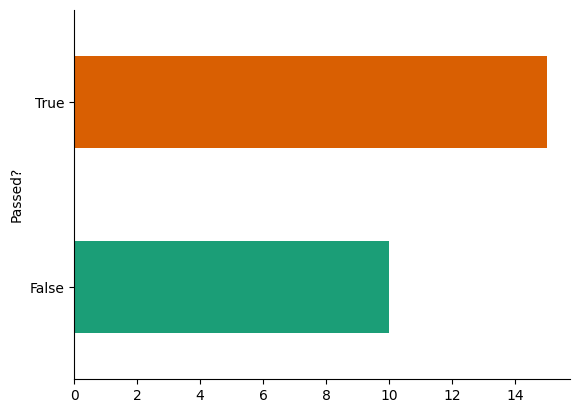

In [64]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Passed?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#Feature Engineering

In [65]:
feature = df['Hours'].values.reshape(-1,1)
target = df['Passed?'].values

#Splitting the Data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=0)

#Training the KNN Model

In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

#Accuracy

In [69]:
knn.score(X_train, y_train)

0.9

In [70]:
knn.score(X_test, y_test)

1.0

#Predicting the outcomes

In [71]:
get_results = [[9.25]]

In [72]:
knn.predict(get_results)

array([ True])

In [73]:
knn.predict([[14]])

array([ True])

In [74]:
knn.predict([[3]])

array([False])